In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/my_stats.txt', delim_whitespace=True, skipinitialspace=True)
df = df.drop(columns=['Score', 'Score.1'])
day = pd.Index(df.pop('Day'))
df = df.set_index(day)
df.columns = ['Time_part1', 'Rank_part1', 'Time_part2', 'Rank_part2']
df = df.replace(to_replace='>24h', value='24:00:00')

df['Time_part1'] = pd.to_timedelta(df['Time_part1']) / pd.Timedelta(1, 'H')
df['Time_part2'] = pd.to_timedelta(df['Time_part2']) / pd.Timedelta(1, 'H')

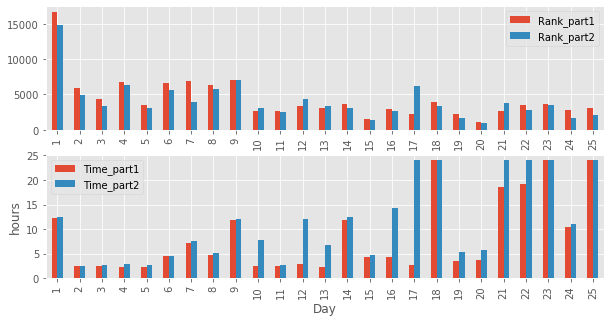

In [3]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=2)
df[['Rank_part1', 'Rank_part2']].sort_index().plot.bar(ax=ax1)
df[['Time_part1', 'Time_part2']].sort_index().plot.bar(ax=ax2)
ax2.set_ylabel('hours')
plt.savefig(r'C:\Temp\fig1.png', dpi=200)